In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")

In [2]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

c:\Deepak\AgenticAIWorkshop\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs


USER_AGENT environment variable not set, consider setting it to identify your requests.


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nWe are growing and hiring for multiple roles for LangChain, LangGraph and LangSmith.  Join our team!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n

In [4]:
doc_list = [item for sublist in docs for item in sublist]
doc_list

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'),
 Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\nWorkflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nWe are growing and hiring for multiple roles for LangChain, LangGraph and LangSmith.  Join our team!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n 

In [5]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, 
                            chunk_overlap=100)

doc_splits = text_splitter.split_documents(doc_list)

In [6]:
doc_splits

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Workflows & agents\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\nWe are growing and hiring for multiple roles for LangChain, LangGraph and LangSmith.  Join our team!\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Workflows & agents\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n         

In [7]:
vectorstore =FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)

retreiver=vectorstore.as_retriever()

In [8]:
retreiver.invoke("What is langgraph?")

[Document(id='3d832c40-b299-4d5e-841d-45e9b5461fe8', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Workflows & agents', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='LangSmith Trace\nhttps://smith.langchain.com/public/abab6a44-29f6-4b97-8164-af77413e494d/r\nWhat LangGraph provides¶\nBy constructing each of the above in LangGraph, we get a few things:\nPersistence: Human-in-the-Loop¶\nLangGraph persistence layer supports interruption and approval of actions (e.g., Human In The Loop). See Module 3 of LangChain Academy.\nPersistence: Memory¶\nLangGraph persistence layer supports conversational (short-term) memory and long-term memory. See Modules 2 and 5 of LangChain Academy:\nStreaming¶\nLangGraph provides several ways to stream workflow / agent outputs or intermediate state. See Module 3 of LangChain Academy.\nDeployment¶\nLangGraph provides an easy on-ramp for deployment

In [9]:
from langchain.tools.retriever import create_retriever_tool

retreiver_tool = create_retriever_tool(
    retreiver,
    "retreiver_vector_db_blog",
    "Search and run information about Langgraph"
)

In [10]:
retreiver_tool

Tool(name='retreiver_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000001C00235C2C0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001C00149E0C0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000001C00235C860>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001C00149E0C0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_co

In [11]:
tools = [retreiver_tool]

In [12]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [13]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-70b-8192")
llm.invoke("Hey there")

AIMessage(content="Hey! How's it going?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 12, 'total_tokens': 20, 'completion_time': 0.047344222, 'prompt_time': 0.000138608, 'queue_time': 0.054813532, 'total_time': 0.04748283}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--ef239df8-9692-4696-8f95-46f13c48f85a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 8, 'total_tokens': 20})

In [ ]:
# Define Agent
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retreive using the retrieval tool, or simply end.
    
    
    Args:
        state(message): The current state
        
    Returns:
        dict: The updated state with the agent response appended to messages
    """

    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="llama3-70b-8192")
    model=model.bind_tools(tools)
    response= model.invoke(messages)
    # we return a list, because this will get added to the existing list
    return {"messages": [response]}

    


In [15]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field



In [16]:
### Edges
def grade_document(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retreived documents are relevant to the question.
    
    Args:
        state(messages): The current state
        
    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE OF QUERY---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    model = ChatGroq(model='llama3-70b-8192')

    # LLM with tool and validaiton
    llm_with_tool = model.with_structured_output(grade)

    # prompt
    prompt = PromptTemplate(
        template="""You are a grader assesing relevance of a retreived document to a user question. \n
        Here is the retreived document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keywords(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give the binary score 'yes' or 'no' score to indicate whether the document is relevant to the quesiton.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1] # retreived docs

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


In [17]:
def generate(state):
    """
    Generate answer
    
    Args:
        state (messages): The current state
        
    Returns:
        dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message=messages[-1]

    docs = last_message.content

    # prompt
    prompt = hub.pull("rlm/rag-prompt")

    #LLM
    llm = ChatGroq(model='llama3-70b-8192')

    # post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)
    
    # chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run 
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages":[response]}


In [ ]:
print( "*" * 20 + "Prompt[rlm/rag-prompt]" + "*" * 20)
prompt = hub.pull("rlm/rag-prompt").pretty_print()

********************Prompt[rlm/rag-prompt]********************


c:\Deepak\AgenticAIWorkshop\venv\Lib\site-packages\langsmith\client.py:280: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [19]:
def rewrite(state):
    """
    Transform the query to produce a better question.
    
    Args:
        state (messages): The current state
        
    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f"""\n
    Look at the input and try to reason about the underlying semantic intent / meaning. \n
    Here is the initial question:
    \n ------ \n
    {question}
    \n ------ \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model = "llama3-70b-8192")
    response = model.invoke(msg)
    return {"messages": [response]}

In [28]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent) # agent
retrieve = ToolNode([retreiver_tool])
workflow.add_node("retrieve",retrieve) # retreival
workflow.add_node("grade_document", grade_document)
workflow.add_node("rewrite", rewrite)
workflow.add_node("generate", generate) # generate a response after we know the documents are relavant
workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

workflow.add_edge("retrieve", "grade_document")
# Edges taken after the 'action' node is called
workflow.add_conditional_edges(
    "grade_document",
    # Asses agent decision
    grade_document,
    {
        "generate": "generate",
        "rewrite": "rewrite"
    }
)

workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# compile
graph = workflow.compile()

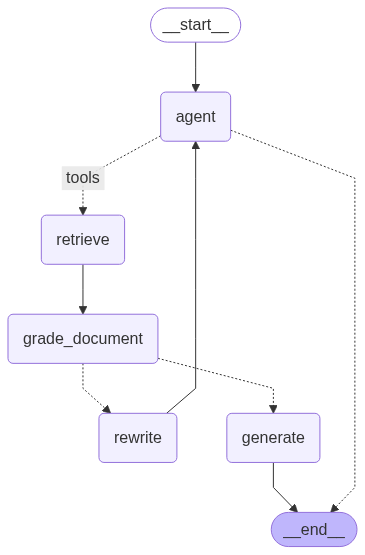

In [29]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
print(graph.get_graph().draw_mermaid())

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	agent(agent)
	retrieve(retrieve)
	grade_document(grade_document)
	rewrite(rewrite)
	generate(generate)
	__end__([<p>__end__</p>]):::last
	__start__ --> agent;
	generate --> __end__;
	retrieve --> grade_document;
	rewrite --> agent;
	agent -. &nbsp;tools&nbsp; .-> retrieve;
	agent -.-> __end__;
	grade_document -.-> generate;
	grade_document -.-> rewrite;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

